<a href="https://colab.research.google.com/github/vinayshanbhag/math/blob/master/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principal Component Analysis (PCA)

PCA is an unsupervised dimensionality reduction technique that can be used for feature extraction, wherein we can construct a lower dimensional subspace from a dataset with large number of features.

The goal of PCA is to find directions of maximum variance in high-dimensional data and project the data into a new subspace with equal or fewer dimensions.

PCA can be summarized in following steps-

1. Standardize the $m$-dimensional dataset
2. Create covariance matrix
3. Perform eigen decomposition of the covariance matrix
4. Sort eigenvectors in descending order of their corresponding eigenvalues
5. Select $k$ eigenvectors with the largest eigenvalues, where $k$ is the number of principal components we are interested in $(k \leq m)$
6. Create projection matrix $W$ from top $k$ eigenvectors
7. Transform the input dataset using $W$ to get new $k$-dimensional features 



In [35]:
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
%matplotlib inline
figsize=(10,5)

The open source UCI wine dataset built into sklearn has 13 features for each sample. The target is one of 3 cultivars from Italy. The targets are not used by PCA and are used here only for illustrating PCA results in the end.

In [4]:
X, y = load_wine(return_X_y=True)
print(f"X.shape={X.shape}, y.shape={y.shape}")

X.shape=(178, 13), y.shape=(178,)


### 1. Standardize the  $m$-dimensional dataset

Feature-wise standardization of input $X$

\begin{align*}
X_{std} = \frac{(X - \mu)}{\sigma}
\end{align*}

In [16]:
X_std = (X-X.mean(axis=0))/X.std(axis=0)

### 2. Create covariance matrix

Covariance between features $j$ and $k$ is given by &ndash;

\begin{align*}
\sigma_{jk}= \frac{1}{n-1}\displaystyle\sum_{i=1}^{n}(x_j^{(i)}-\mu_j)(x_k^{(i)}-\mu_k)
\end{align*}

A covariance matrix with $m$ features will look like this&ndash;

\begin{align*}
\Sigma = \begin{bmatrix}\sigma_{1}^2&\sigma_{12}&\ldots&\sigma_{1m}\\\sigma_{21}&\sigma_{2}^2&\ldots&\sigma_{2m}\\\vdots&\vdots&\ddots&\vdots\\\sigma_{m1}&\sigma_{m2}&\ldots&\sigma_{m}^2\end{bmatrix}
\end{align*}

> $\Sigma \in \mathbb{R}^{m\mathbb{x}m}$


In [24]:
cov_mat = np.cov(X_std.T)
print(f"Covariance matrix shape:{cov_mat.shape}")

Covariance matrix shape:(13, 13)


### 3. Perform eigen decomposition of the covariance matrix

We want to find eigenpairs of the covariance matrix such that&ndash;

\begin{align*}
\Sigma v = \lambda v
\end{align*}

>$\lambda$ is a scalar, the eigenvalue

Eigenvalues are simply the coefficients attached to eigenvectors, which give the axes magnitude. In this case, they are the measure of the data’s covariance.

In [32]:
# Eigen decompose the covariance matrix
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]

### 4. Sort eigenvectors 

Sort eigenvectors in descending order of their corresponding eigenvalues


In [33]:
# Sort the eigen pairs by eigen values in descending order
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

### 5. Select $k$ eigenvectors

Since our goal is to reduce dimensionality, we want to only select the eigenvectors that contain most of the information (variance)

Explained variance ratio = $\frac{\lambda_j}{\sum_{j=1}^{d}\lambda_j}$

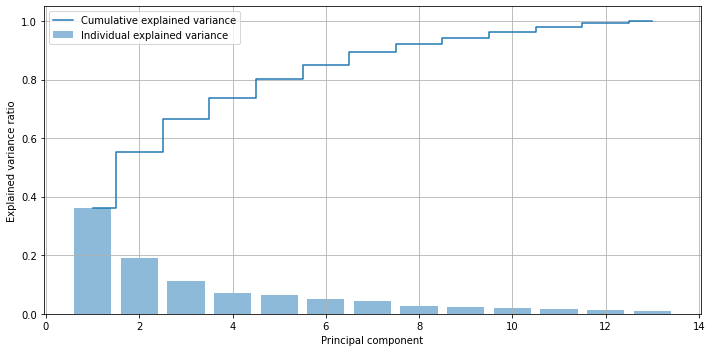

In [40]:
total_var = np.sum([i[0] for i in eigen_pairs])
expl_var = [i[0]/total_var for i in eigen_pairs]
cumulative_var = np.cumsum(expl_var)

plt.figure(figsize=figsize)
plt.bar(range(1,X.shape[1]+1), expl_var, alpha=0.5, align='center',label='Individual explained variance')
plt.step(range(1,X.shape[1]+1), cumulative_var, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.grid();
plt.tight_layout();

We can see that first two principal components account for roughly 60% of the explained variance

### 6. Create projection matrix $W$ from top $k$ eigenvectors

Create the projection matrix $W$ using top $k$ eigenvectors. 

> $W \in \mathbb{R}^{m \mathbb{x} k}$

In [46]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis]))
print(f"Transformation matrix shape:{w.shape}")

Transformation matrix shape:(13, 2)


### 7. Transform the input dataset using $W$

\begin{align*}
X^\prime = XW
\end{align*}

> $X \in \mathbb{R}^{n\mathbb{x}m}$ $n$ samples and $m$ features \\
> $W \in \mathbb{R}^{m\mathbb{x}k}$ $m$ features and $k$ components \\
> $X^\prime \in \mathbb{R}^{n\mathbb{x}k}$ $n$ samples and $k$ principal components 

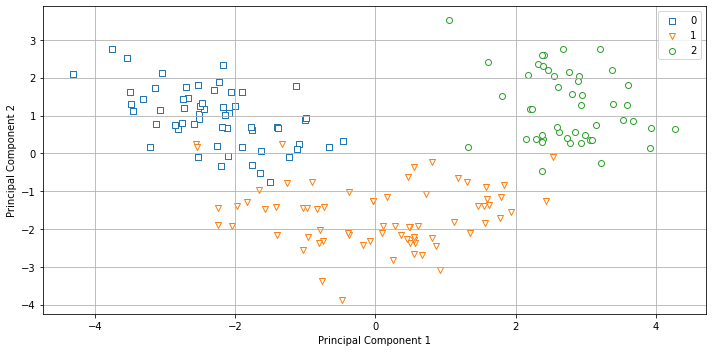

In [55]:
X_pca = X_std.dot(w)
plt.figure(figsize=figsize)
colors =['tab:blue','tab:orange','tab:green']
markers=list('svo')
for l,c,m in zip(np.unique(y), colors, markers):
    plt.scatter(X_pca[y==l, 0],
                X_pca[y==l, 1],
                color='white',
                edgecolor=c,
                label=l,
                marker=m
               )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid();
plt.legend()
plt.tight_layout();